**Mini-project task with linear regression in multidimensional input space and batch learning**

Autors: Laura Nilsson & Leo Svanemar
Date: 2023-05-22



In [31]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D


**Assignment 1: Plot**

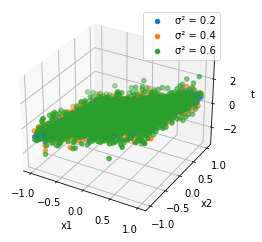

In [32]:

x1 = np.arange(-1, 1.05, 0.05)
x2 = np.arange(-1, 1.05, 0.05)
X1, X2 = np.meshgrid(x1, x2)

w0 = 0
w1 = 1.5
w2 = -0.8
sigma_values = [0.2, 0.4, 0.6]

np.random.seed(50)  # Set a random seed for reproducibility

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for sigma in sigma_values:
    t = w0 + w1 * X1 + w2 * X2 + np.random.normal(0, sigma, size=X1.shape)
    ax.scatter(X1, X2, t, label=f"σ² = {sigma}")

# Add labels and legend
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('t')
ax.legend()

plt.show()
